### Notebook to compute PRIM in the posterior trained with 200 initial LHS samples and 200 samples found by the algorithm

The posterior is calculated in 800 input LHS points

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

###### Load data: the initial points + points taken by the perfect model
with open('X_AL_PRIM.pickle', 'rb') as handle:
    X = pickle.load(handle)
with open('Y_AL_PRIM.pickle', 'rb') as handle:
    y = pickle.load(handle)
with open('Output_AL_PRIM.pickle', 'rb') as handle:
    posterior = pickle.load(handle)

###### Load data
with open('Data/X800.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
with open('Data/output800.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Initial = 200
output= posterior.mean
percentil_20 = np.percentile(output, 20)
print(percentil_20)

7685.837694327715


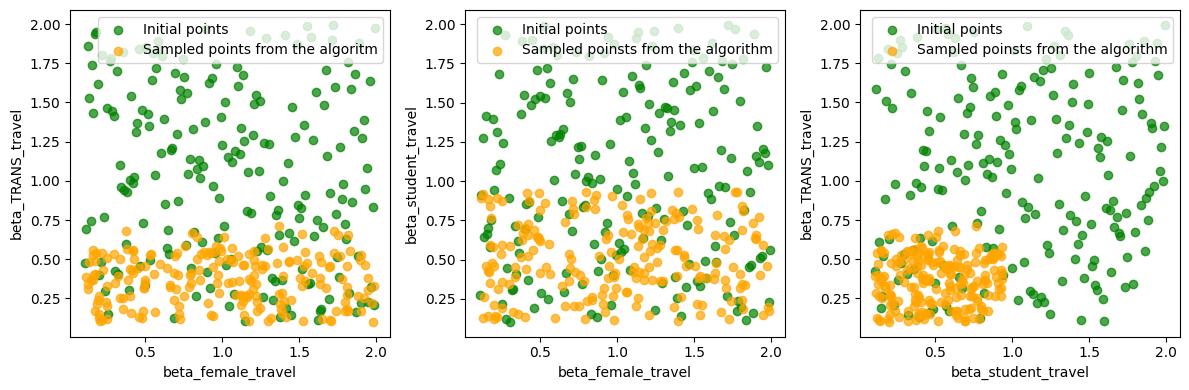

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X[:Initial,0], X[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[0].scatter(X[Initial:,0], X[Initial:,2], c='orange', label = 'Sampled points from the algoritm', alpha =0.7)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X[:Initial,0], X[:Initial,1], c='green', label = 'Initial points', alpha =0.7)
axes[1].scatter(X[Initial:,0], X[Initial:,1], c='orange', label = 'Sampled poinsts from the algorithm', alpha =0.7)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X[:Initial,1], X[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[2].scatter(X[Initial:,1], X[Initial:,2], c='orange', label = 'Sampled poinsts from the algorithm', alpha =0.7)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

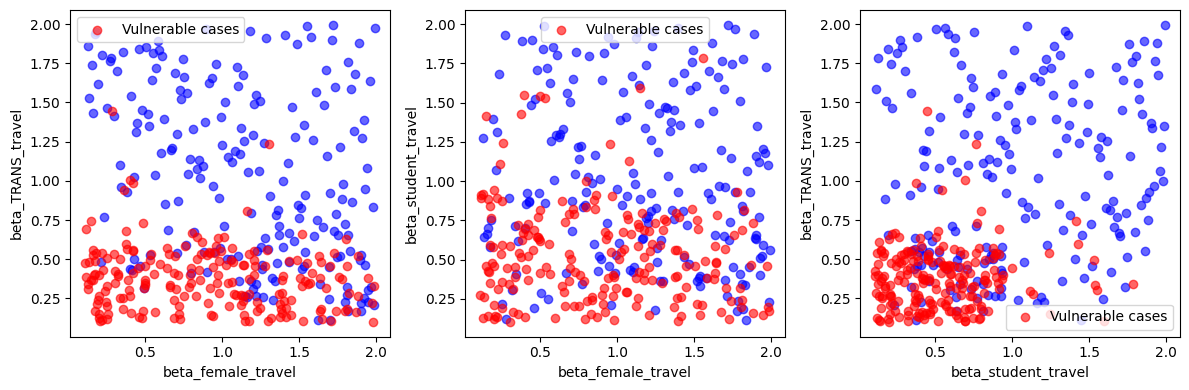

In [3]:
Y_mask= y < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(X[~Y_mask,0], X[~Y_mask,2], c='blue', alpha =0.6)
axes[0].scatter(X[Y_mask,0], X[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X[~Y_mask,0], X[~Y_mask,1], c='blue', alpha =0.6)
axes[1].scatter(X[Y_mask,0], X[Y_mask,1], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X[~Y_mask,1], X[~Y_mask,2], c='blue', alpha =0.6)
axes[2].scatter(X[Y_mask,1], X[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

#### Posterior distribution data analysis

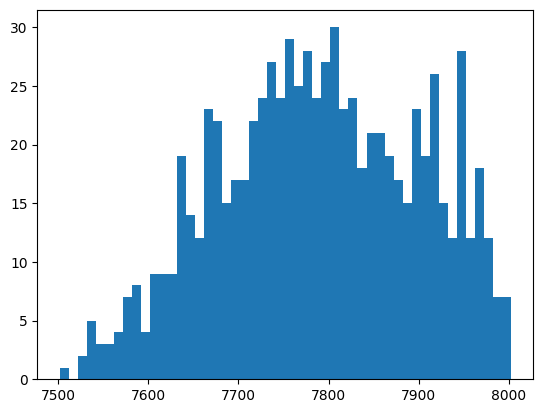

In [4]:
plt.hist(output, bins= 50)
plt.show()

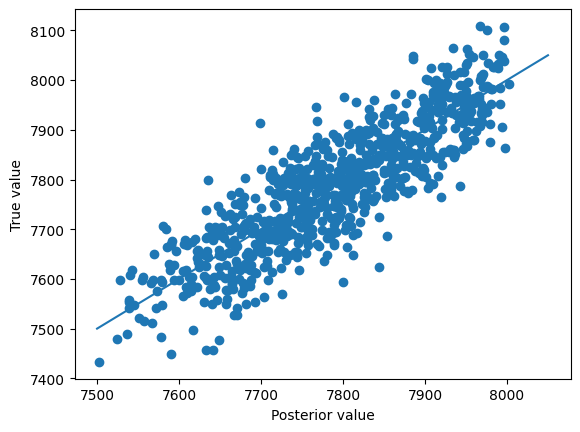

In [5]:
plt.scatter(output, y_test)
plt.xlabel("Posterior value")
plt.ylabel("True value")
plt.plot([7500, 8050],[7500, 8050])

In [6]:
print("Error of the posterior: ", ((np.sqrt(sum((output-y_test)**2)/400))))

Error of the posterior:  tensor(90.7435, dtype=torch.float64)


In [7]:
np.corrcoef(output, y_test)

array([[1.        , 0.86389459],
       [0.86389459, 1.        ]])

In [8]:
Y= [1 if output[i] < percentil_20 else 0 for i in range(len(output))]
Y= np.array(Y).astype(float)
print("Number of vulnerable scenarios: ", sum(Y), " where the leasure trips are less than ", percentil_20, "in the whole population")

Number of vulnerable scenarios:  160.0  where the leasure trips are less than  7685.837694327715 in the whole population


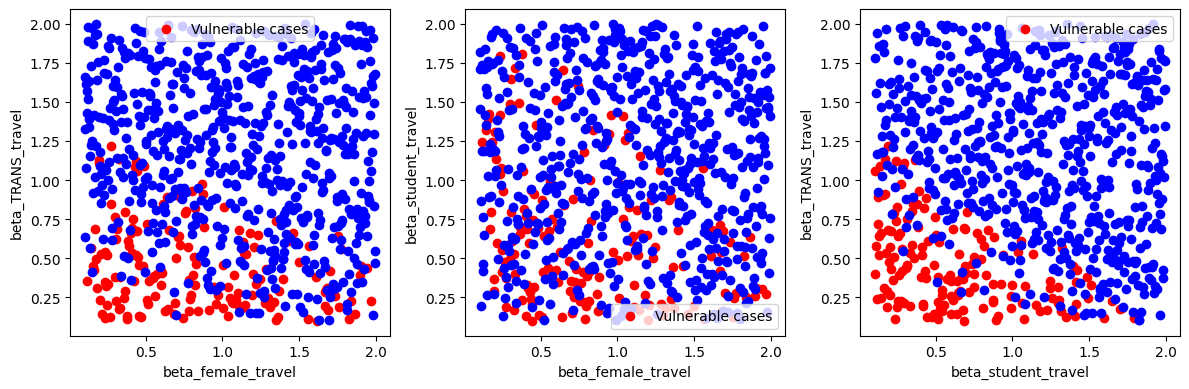

In [9]:
Y_mask= output < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(X_test[Y_mask,0], X_test[Y_mask,2], c='red', label= 'Vulnerable cases')
axes[0].scatter(X_test[~Y_mask,0], X_test[~Y_mask,2], c='blue')
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X_test[Y_mask,0], X_test[Y_mask,1], c='red', label= 'Vulnerable cases')
axes[1].scatter(X_test[~Y_mask,0], X_test[~Y_mask,1], c='blue')
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X_test[Y_mask,1], X_test[Y_mask,2], c='red', label= 'Vulnerable cases')
axes[2].scatter(X_test[~Y_mask,1], X_test[~Y_mask,2], c='blue')
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

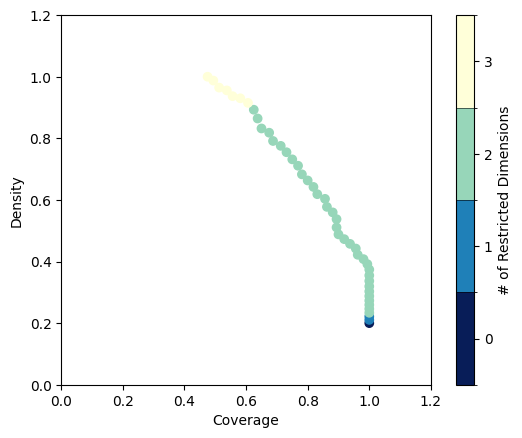

In [10]:
import prim
import pandas as pd
import matplotlib.pyplot as plt

p = prim.Prim(X_test, Y, threshold=0.3, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

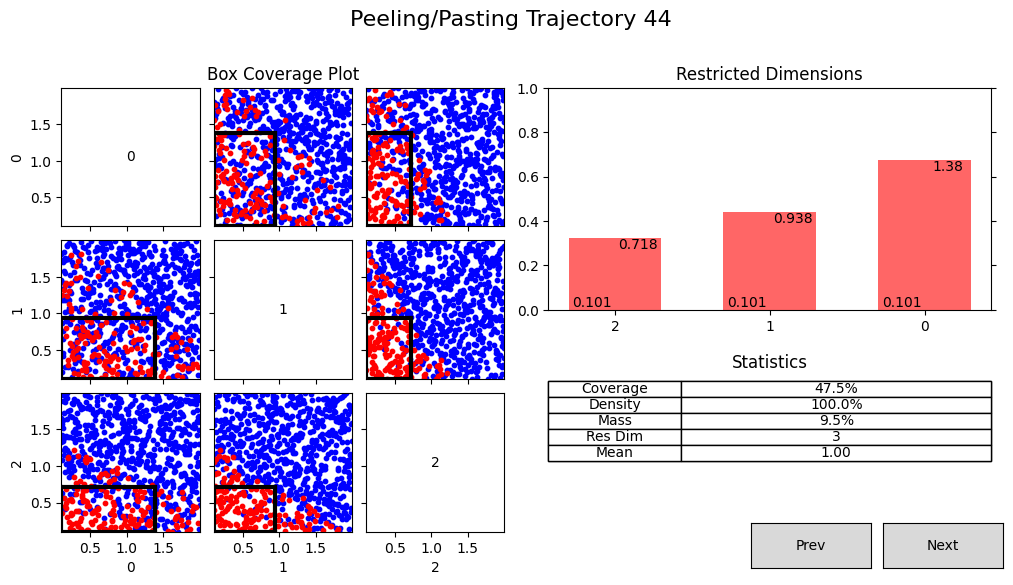

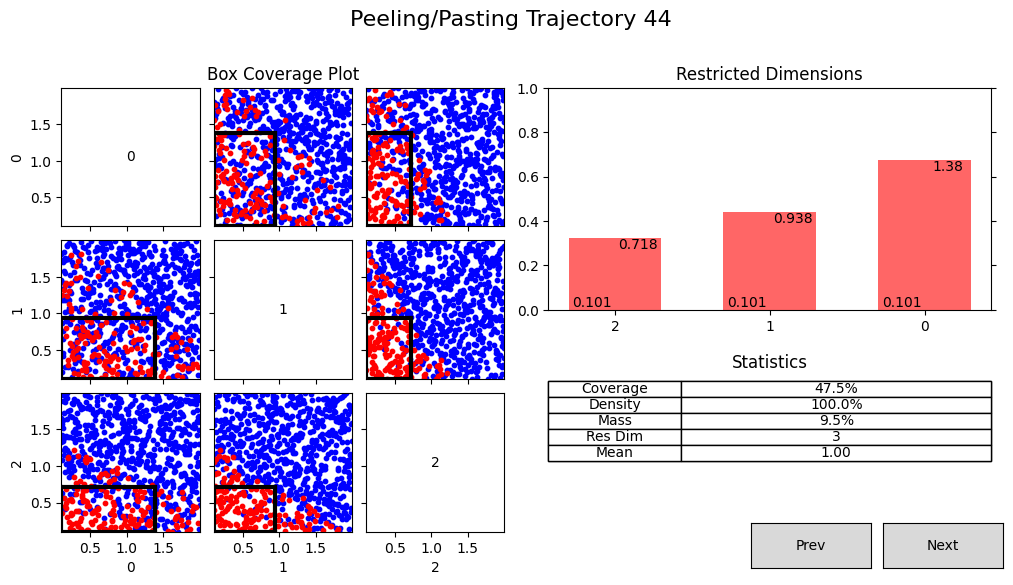

In [11]:
box.show_details()

In [12]:
with open('Data/Limits800.pickle', 'rb') as f:
    base = pickle.load(f)

In [13]:
limits = box.limits
limits

,min,max,qp values
2,0.101187,0.717500,1.973009e-29
1,0.101187,0.938375,1.299942e-16
0,0.101187,1.381312,1.817315e-04


In [14]:
def get_distance(limits, base):
    df = base.join(limits, lsuffix='_base', how='outer')
    df = df.fillna(0)
    df['distance'] = (df['min'] - df['min_base'])**2 + (df['max'] - df['max_base'])**2
    return np.sqrt(df['distance'].sum())

In [15]:
distance = get_distance(limits, base)
distance

0.7103136246141559

### Performing PRIM in the posterior trained with 200 initial LHS samples and 200 samples found by the algorithm that samples in the borders

The posterior is computed in 800 LHS input points

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

###### Load data: the initial points + points taken by the perfect model
with open('X_AL_PRIM_borders.pickle', 'rb') as handle:
    X = pickle.load(handle)
with open('Y_AL_PRIM_borders.pickle', 'rb') as handle:
    y = pickle.load(handle)
with open('Output_AL_PRIM_borders.pickle', 'rb') as handle:
    posterior = pickle.load(handle)

###### Load data
with open('Data/X800.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
with open('Data/output800.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Initial = 200
output= posterior.mean
percentil_20 = np.percentile(output, 20)
print(percentil_20)

7678.059574521823


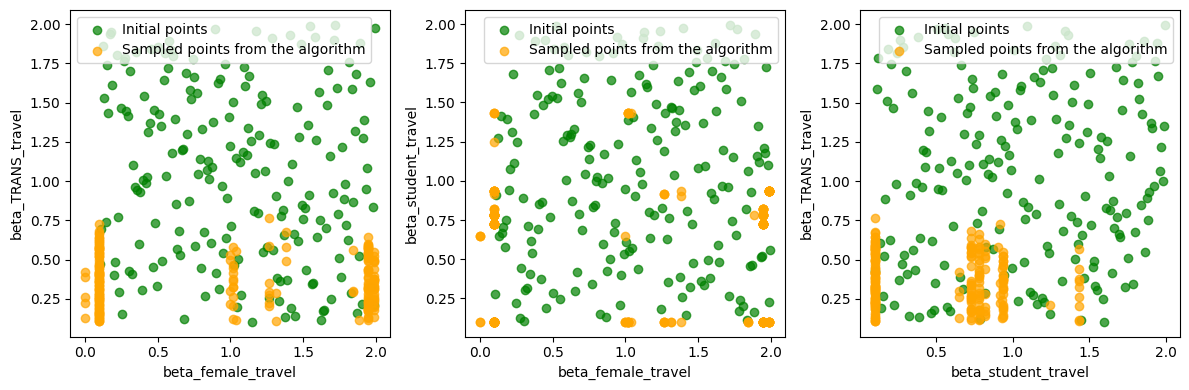

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X[:Initial,0], X[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[0].scatter(X[Initial:,0], X[Initial:,2], c='orange', label = 'Sampled points from the algorithm', alpha =0.7)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X[:Initial,0], X[:Initial,1], c='green', label = 'Initial points', alpha =0.7)
axes[1].scatter(X[Initial:,0], X[Initial:,1], c='orange', label = 'Sampled points from the algorithm', alpha =0.7)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X[:Initial,1], X[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[2].scatter(X[Initial:,1], X[Initial:,2], c='orange', label = 'Sampled points from the algorithm', alpha =0.7)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

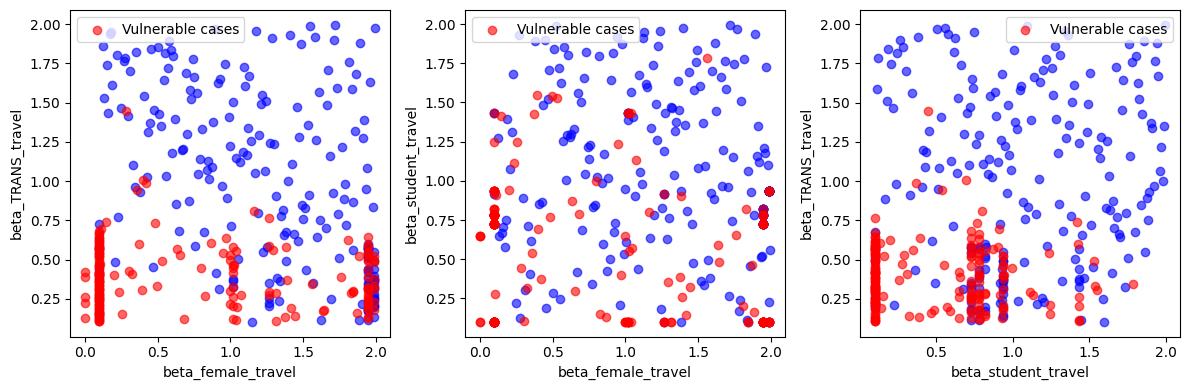

In [88]:
Y_mask= y < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(X[~Y_mask,0], X[~Y_mask,2], c='blue', alpha =0.6)
axes[0].scatter(X[Y_mask,0], X[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X[~Y_mask,0], X[~Y_mask,1], c='blue', alpha =0.6)
axes[1].scatter(X[Y_mask,0], X[Y_mask,1], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X[~Y_mask,1], X[~Y_mask,2], c='blue', alpha =0.6)
axes[2].scatter(X[Y_mask,1], X[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

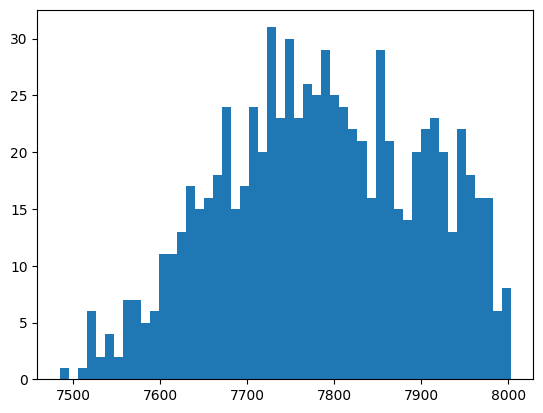

In [89]:
plt.hist(output, bins= 50)
plt.show()

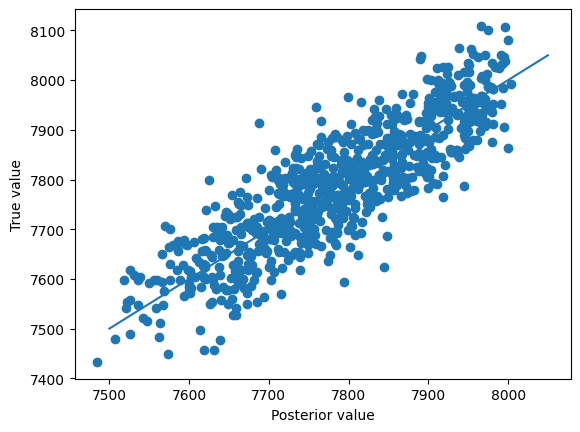

In [90]:
output = posterior.mean
plt.scatter(output, y_test)
plt.xlabel("Posterior value")
plt.ylabel("True value")
plt.plot([7500, 8050],[7500, 8050])

In [91]:
print("Error of the posterior: ", ((np.sqrt(sum((output-y_test)**2)/400))))

Error of the posterior:  tensor(90.9452, dtype=torch.float64)


In [92]:
Y= [1 if output[i] < percentil_20 else 0 for i in range(len(output))]
Y= np.array(Y).astype(float)
print("Number of vulnerable scenarios: ", sum(Y), " where the leasure trips are less than ", percentil_20, "in the whole population")

Number of vulnerable scenarios:  160.0  where the leasure trips are less than  7678.059574521823 in the whole population


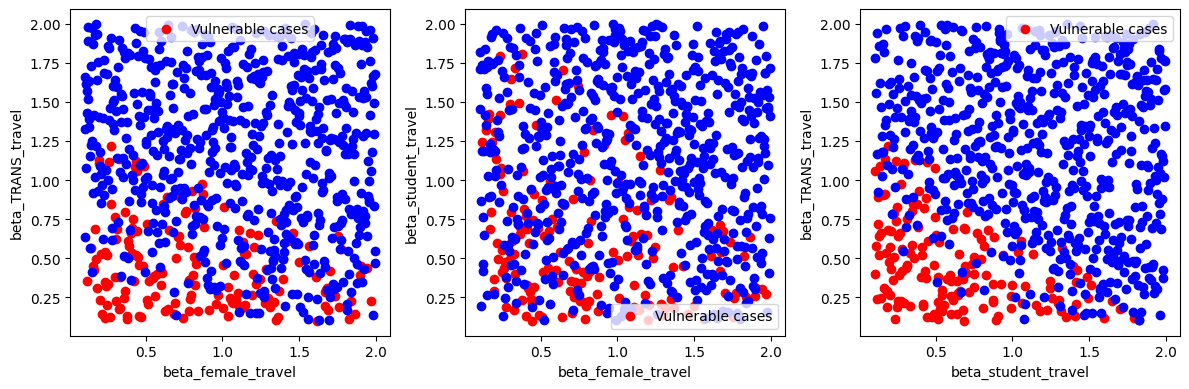

In [93]:
Y_mask= output < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(X_test[Y_mask,0], X_test[Y_mask,2], c='red', label= 'Vulnerable cases')
axes[0].scatter(X_test[~Y_mask,0], X_test[~Y_mask,2], c='blue')
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X_test[Y_mask,0], X_test[Y_mask,1], c='red', label= 'Vulnerable cases')
axes[1].scatter(X_test[~Y_mask,0], X_test[~Y_mask,1], c='blue')
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X_test[Y_mask,1], X_test[Y_mask,2], c='red', label= 'Vulnerable cases')
axes[2].scatter(X_test[~Y_mask,1], X_test[~Y_mask,2], c='blue')
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

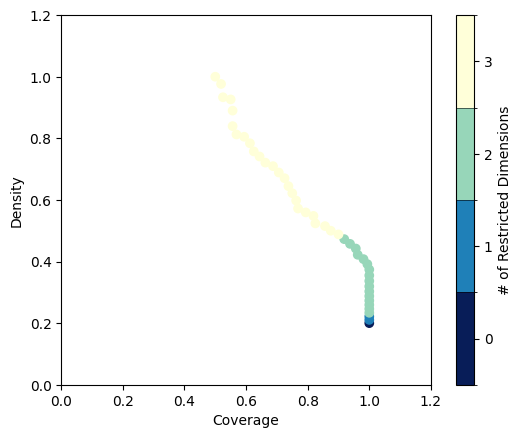

In [94]:
import prim
import pandas as pd
import matplotlib.pyplot as plt

p = prim.Prim(X_test, Y, threshold=0.3, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

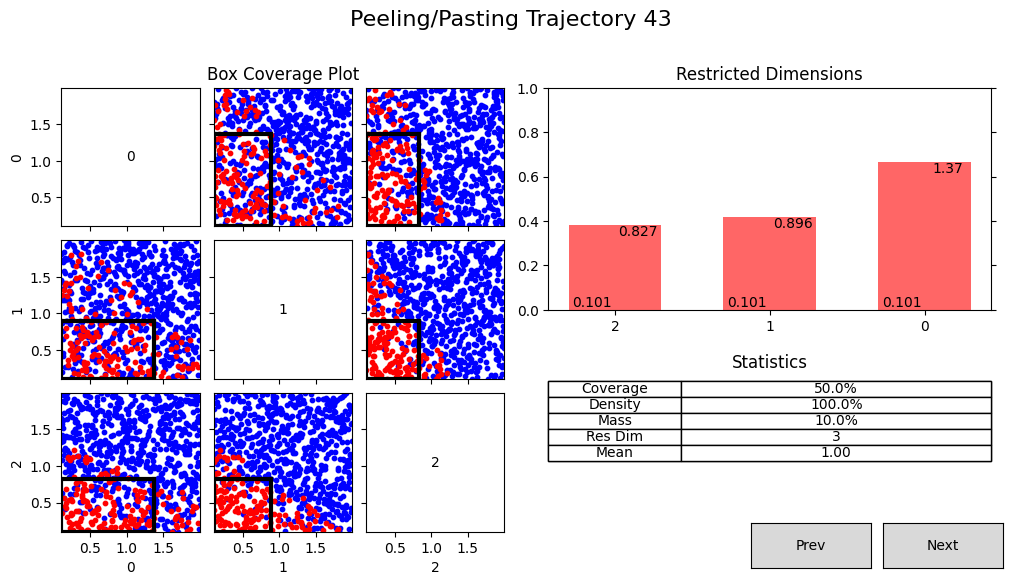

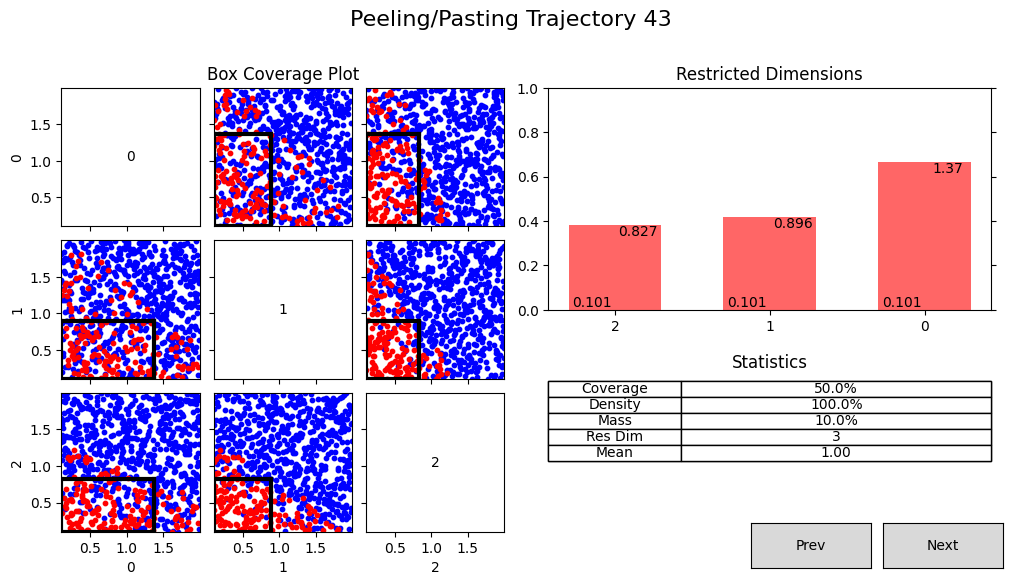

In [95]:
box.show_details()

In [68]:
with open('Data/Limits800.pickle', 'rb') as f:
    base = pickle.load(f)

In [69]:
limits = box.limits

In [70]:
distance = get_distance(limits, base)
distance

0.7759646944489486